In [1]:
import pandas as pd

In [2]:
import requests 
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1. Goals

0. Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке
1. Вывести первые строки таблицы с помощью метода head
2. Определите количество строк и столбцов в датафрейме (атрибут shape)
3. Замените в таблице значения "—" на значения NaN
4. Определите типы всех столбцов с помощью dataframe.dtypes
5. Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"
6. Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)
7. Удалите из таблицы данные по всей стране, последняя строчка таблицы
8. Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)
9. Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине
10. В каком регионе была самая высокая рождаемость в 2014 году?
11. Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

In this case request library will be used, because for some reasons pd.read_html can not read this exact url

## 0. Прочитайте данные с помощью метода read_html из таблицы "Коефіцієнт народжуваності в регіонах України (1950—2019)" по ссылке

In [3]:
response = requests.get(
    "https://uk.wikipedia.org/wiki/Населення_України#Народжуваність"
)

In [4]:
all_tables = pd.read_html(response.text)


In [5]:
work_table = all_tables[10]
work_table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—
5,Житомирська,261.0,223.0,159.0,129,89,122,120,79
6,Закарпатська,314.0,273.0,207.0,168,115,151,146,104
7,Запорізька,219.0,197.0,150.0,124,71,106,106,68
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122,88
9,Київська,204.0,189.0,156.0,123,73,122,121,80


Now, table parsed incorect: all numeric values are 10 times bigger then they should be.

Also, for no data, somewhere there is "NaN", and somewhere "—", - must be unified.

## 1. Вывести первые строки таблицы с помощью метода head

In [6]:
work_table.head(3)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101


## 2. Определите количество строк и столбцов в датафрейме (атрибут shape)

In [7]:
work_table.shape

(28, 9)

## 3. Замените в таблице значения "—" на значения NaN

In [8]:
work_table.head(3)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101


In [9]:
work_table.replace("—", np.nan, inplace=True)
work_table.head(3)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101


## 4. Определите типы всех столбцов с помощью dataframe.dtypes

In [10]:
column_names = [column for column in work_table]
column_names

['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']

In [11]:
for column in column_names:
    print(work_table[column].dtype)

object
float64
float64
float64
int64
int64
int64
object
object


## 5. Замените типы не числовых колонок на числовые. Подсказка - это колонки где находился символ "—"

In [12]:
work_table['2014']= pd.to_numeric(work_table['2014'])
work_table['2019']= pd.to_numeric(work_table['2019'])

In [13]:
for column in column_names:
    print(work_table[column].dtype)

object
float64
float64
float64
int64
int64
int64
float64
float64


## 6. Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [14]:
rows_count = work_table.shape[0]

In [15]:
for column in column_names:
    nulls_in_column = pd.isnull(work_table[column]).sum(axis = 0, skipna = True)
    nulls_ratio_column = nulls_in_column/rows_count
    print(column,nulls_ratio_column)
    

Регіон 0.0
1950 0.07142857142857142
1960 0.03571428571428571
1970 0.03571428571428571
1990 0.0
2000 0.0
2012 0.0
2014 0.07142857142857142
2019 0.14285714285714285


## 7. Удалите из таблицы данные по всей стране, последняя строчка таблицы

In [16]:
work_table.iloc[-1]

Регіон    Україна
1950        228.0
1960        205.0
1970        152.0
1990          126
2000           78
2012          114
2014        111.0
2019         81.0
Name: 27, dtype: object

In [17]:
work_table.drop(work_table.index[-1], inplace=True)

In [18]:
work_table.iloc[-1]

Регіон    Севастополь
1950              NaN
1960              NaN
1970              NaN
1990              125
2000               70
2012              120
2014              NaN
2019              NaN
Name: 26, dtype: object

## 8. Замените отсутствующие данные в столбцах средними значениями по этим столбцам (метод fillna)

In [19]:
work_table.head(8)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0


In [20]:
work_table.fillna(work_table.mean(numeric_only=True),inplace=True)
work_table.head(8)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.000000
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.000000
4,Донецька,271.0,214.0,140.0,109,61,98,82.00,80.173913
5,Житомирська,261.0,223.0,159.0,129,89,122,120.00,79.000000
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.00,104.000000
7,Запорізька,219.0,197.0,150.0,124,71,106,106.00,68.000000


## 9. Получите список регионов, где уровень рождаемости в 2019 году был выше среднего по Украине

In [21]:
avg_2019 = work_table["2019"].mean()
avg_2019

80.17391304347828

In [22]:
high_2019 = work_table.loc[work_table["2019"] >= avg_2019]
high_2019

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,247.00,250.0,179.0,153,112,148,141.0,101.0
6,Закарпатська,314.00,273.0,207.0,168,115,151,146.0,104.0
8,Івано-Франківська,243.00,248.0,182.0,155,103,124,122.0,88.0
12,Львівська,234.00,240.0,171.0,140,91,119,119.0,87.0
14,Одеська,241.00,192.0,148.0,126,80,127,123.0,88.0
16,Рівненська,269.00,267.0,193.0,158,118,159,148.0,107.0
20,Херсонська,208.00,214.0,166.0,143,85,117,115.0,81.0
23,Чернівецька,247.00,218.0,170.0,148,101,128,129.0,92.0
25,Київ,231.04,174.0,159.0,120,73,120,121.0,110.0


## 10. В каком регионе была самая высокая рождаемость в 2014 году?

In [23]:
top_index = work_table['2014'].idxmax()
work_table.iloc[top_index]["Регіон"]

'Рівненська'

## 11. Постройте столбцовую диаграмму рождаемости по регионам в 2019 году

In [25]:
work_table.head(4)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,111.44,80.173913
1,Вінницька,224.0,192.0,142.0,124,84,112,109.00,76.000000
2,Волинська,247.0,250.0,179.0,153,112,148,141.00,101.000000
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.00,71.000000


<AxesSubplot:xlabel='Регіон'>

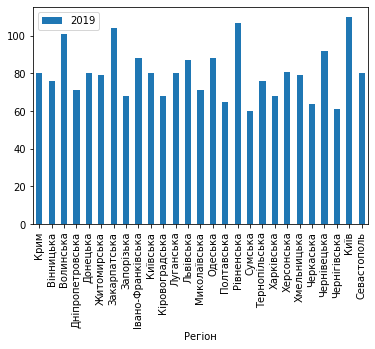

In [27]:
work_table.plot.bar(x='Регіон',y = "2019")